# Econ 148 Lecture Notebook - Jan 30 2023

## NASA example from Dan Hammer Data 88
Astronomy Picture of the Day  - has a public / demo API

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import urllib.request
from PIL import Image
import json

In [2]:
# basic location, on the Internet, someone else's computer rather than ours locally
# like a directory.
url = "https://api.nasa.gov/planetary/apod"

In [3]:
# this is a bad request with no API key (403: forbidden)
print(requests.get(url))
print(requests.get(url).content)

<Response [403]>
b'{\n  "error": {\n    "code": "API_KEY_MISSING",\n    "message": "No api_key was supplied. Get one at https://api.nasa.gov:443"\n  }\n}'


In [4]:
# this is a good request (200: OK)
print(requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-05"}))
print(requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-05"}).content)

<Response [200]>
b'{"date":"2022-02-05","explanation":"Variable star R Aquarii is actually an interacting binary star system, two stars that seem to have a close symbiotic relationship. Centered in this space-based optical/x-ray composite image it lies about 710 light years away. The intriguing system consists of a cool red giant star and hot, dense white dwarf star in mutual orbit around their common center of mass. With binoculars you can watch as R Aquarii steadily changes its brightness over the course of a year or so. The binary system\'s visible light is dominated by the red giant, itself a Mira-type long period variable star. But material in the cool giant star\'s extended envelope is pulled by gravity onto the surface of the smaller, denser white dwarf, eventually triggering a thermonuclear explosion, blasting material into space. Astronomers have seen such outbursts over recent decades. Evidence for much older outbursts is seen in these spectacular structures spanning almost a

### Retrieving the image

In [5]:
# Retrieve the URL for an APOD image, and read the data in directly.
r = requests.get(url, params={"api_key": "DEMO_KEY", "date": "2022-02-06"}).json()
r["url"]

'https://apod.nasa.gov/apod/image/2202/bluemarble_apollo17_960.jpg'

In [6]:
r = requests.get(url, params={"api_key": "DEMO_KEY", "date": "2023-01-30"}).json()
r["url"]

'https://apod.nasa.gov/apod/image/2301/ngc6355_hubble_1080.jpg'

Description: Globular clusters once ruled the Milky Way.  Back in the old days, back when our Galaxy first formed, perhaps thousands of globular clusters roamed our Galaxy.  Today, there are less than 200 left.  Over the eons, many globular clusters were destroyed by repeated fateful encounters with each other or the Galactic center.  Surviving relics are older than any Earth fossil, older than any other structures in our Galaxy, and limit the universe itself in raw age.  There are few, if any, young globular clusters left in our Milky Way Galaxy because conditions are not ripe for more to form. The featured image shows a Hubble Space Telescope view of 13-billion year old NGC 6355, a surviving globular cluster currently passing near the Milky Way's center.  Globular cluster stars are concentrated toward the image center and highlighted by bright blue stars. Most other stars in the frame are dimmer, redder, and just coincidently lie near the direction to NGC 6355.


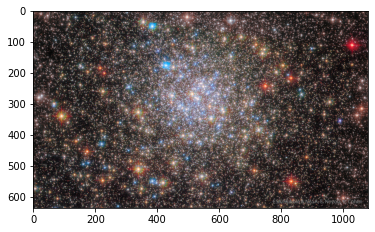

In [7]:
image_url = r["url"]

# show image
with urllib.request.urlopen(image_url) as url:
    s = url.read()
im = np.array(Image.open(io.BytesIO(s)))
plt.imshow(im)

# show description
desc = r['explanation']
print("Description: " + desc)

# Back to EIA example

In [8]:
my_api_key = "5hPnULbtrhHk3j8BWkHdX5cVHzQhMq6DRIWEYzKT"

In [9]:
# The url that stores the EIA data
api_url = "https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/"

# The API key param and your API key
api_key = "?api_key="+my_api_key

# Selects just California and pulls data values
api_data_pull = "&facets[stateId][]=CA&data[]=value"

# Makes a GET request to pull the data
#response = requests.get(api_url+api_key+api_data_pull)
response = requests.get("https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/" \
                        "?api_key=5hPnULbtrhHk3j8BWkHdX5cVHzQhMq6DRIWEYzKT" \
                        "&facets[stateId][]=CA&data[]=value")
                        


# The response from the API in JSON form
r = response.json()

In [10]:
r["response"]["data"][0]

{'period': 1970,
 'sectorId': 'RC',
 'sector-name': 'Residential carbon dioxide emissions',
 'fuelId': 'CO',
 'fuel-name': 'Coal',
 'stateId': 'CA',
 'state-name': 'California',
 'value': 0.128968,
 'value-units': 'million metric tons of CO2'}

## FRED API example

In [11]:
api_key = "dab081fe5e028d7fc65114e0c7f2cf6b"
series_id = 'SP500'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json'
response = requests.get(url)
sp500_data = response.json()
print(json.dumps(sp500_data, indent=2))

{
  "realtime_start": "2023-01-30",
  "realtime_end": "2023-01-30",
  "observation_start": "1600-01-01",
  "observation_end": "9999-12-31",
  "units": "lin",
  "output_type": 1,
  "file_type": "json",
  "order_by": "observation_date",
  "sort_order": "asc",
  "count": 2610,
  "offset": 0,
  "limit": 100000,
  "observations": [
    {
      "realtime_start": "2023-01-30",
      "realtime_end": "2023-01-30",
      "date": "2013-01-28",
      "value": "1500.18"
    },
    {
      "realtime_start": "2023-01-30",
      "realtime_end": "2023-01-30",
      "date": "2013-01-29",
      "value": "1507.84"
    },
    {
      "realtime_start": "2023-01-30",
      "realtime_end": "2023-01-30",
      "date": "2013-01-30",
      "value": "1501.96"
    },
    {
      "realtime_start": "2023-01-30",
      "realtime_end": "2023-01-30",
      "date": "2013-01-31",
      "value": "1498.11"
    },
    {
      "realtime_start": "2023-01-30",
      "realtime_end": "2023-01-30",
      "date": "2013-02-01",
   

In [12]:
sp500_df = pd.DataFrame(sp500_data['observations'])
sp500_df

,realtime_start,realtime_end,date,value
0,2023-01-30,2023-01-30,2013-01-28,1500.18
1,2023-01-30,2023-01-30,2013-01-29,1507.84
2,2023-01-30,2023-01-30,2013-01-30,1501.96
3,2023-01-30,2023-01-30,2013-01-31,1498.11
4,2023-01-30,2023-01-30,2013-02-01,1513.17
...,...,...,...,...
2605,2023-01-30,2023-01-30,2023-01-23,4019.81
2606,2023-01-30,2023-01-30,2023-01-24,4016.95
2607,2023-01-30,2023-01-30,2023-01-25,4016.22
2608,2023-01-30,2023-01-30,2023-01-26,4060.43
